# Nutrition Analysis Tour
## Action: Inferential statistics on the sb_prep2.csv file
## Language/tool: R
---

In [7]:
library(dplyr)

#### Assign variables

In [4]:
dat      <- read.csv("sb_prep2.csv")
name_len <- filter(dat) %>% dplyr::select(name_length) %>% unlist
cal      <- filter(dat) %>% dplyr::select(cal_perc_dv) %>% unlist
caff     <- filter(dat) %>% dplyr::select(caff_perc_dv) %>% unlist
sug      <- filter(dat) %>% dplyr::select(sug_perc_dv) %>% unlist

#### Utilizing basic graphing methods with no additional libraries
#### Alternate hypothesis #1: there is a correlation between sugar and calories 
#### Alternate hypothesis #2: there is a correlation between sugar and caffeine
#### Null hypothesis #1: there is no correlation between sugar and calories
#### Null hypothesis #2: there is no correlation between sugar and caffeine

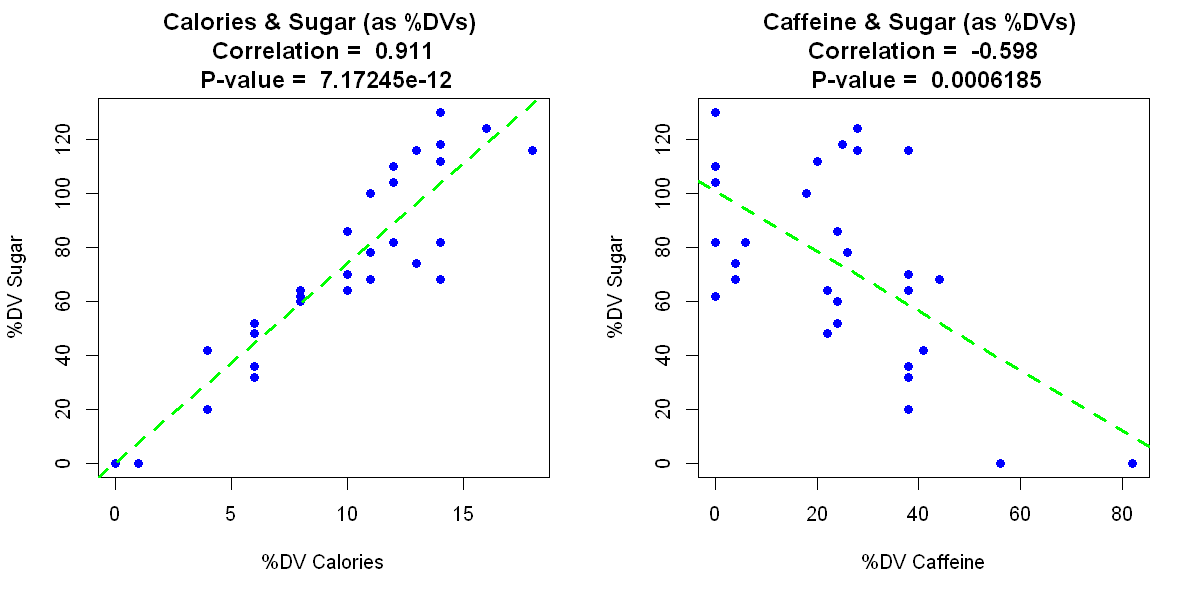

In [13]:
par(mfrow = c(1, 2))
plot(cal, sug, main = paste("Calories & Sugar (as %DVs) \n Correlation = ", signif(cor(cal, sug),3), 
     "\n P-value = ", signif(cor.test(cal, sug)$p.value)), xlab = "%DV Calories", ylab = "%DV Sugar", pch = 16, col = "blue")
abline(lm(sug ~ cal, data = dat), col="green", lwd = 3, lty = 2)

plot(caff, sug, main = paste("Caffeine & Sugar (as %DVs) \n Correlation = ", signif(cor(caff, sug),3), 
     "\n P-value = ", signif(cor.test(caff, sug)$p.value)), xlab = "%DV Caffeine", ylab = "%DV Sugar", pch = 16, col = "blue")
abline(lm(sug ~ caff, data = dat), col="green", lwd = 3, lty = 2)
par(mfrow = c(1, 1))

#### Conclucions:
+  There is a strong correlation between increasing calories and increasing sugar (as %DVs) 
+  There is a moderate correlation between increasing caffeine and decreasing sugar (as %DVs) 
+  For both graphs, the p-value (probability of result occurring if correlation = zero) is less than the default 5% (0.05), therefore the correlation coefficient is statistically significant and the null hypothesis is rejected
---

#### Utilizing graphing methods with additional libraries

In [9]:
library(ggplot2)
library(ggpubr)

#### Alternate hypothesis #3: there is a correlation between drink name character length and...
+  A: calories
+  B: caffeine
+  C: sugar  

#### Null hypothesis #3: there is no correlation between drink name character length and...
+  A: calories
+  B: caffeine
+  C: sugar

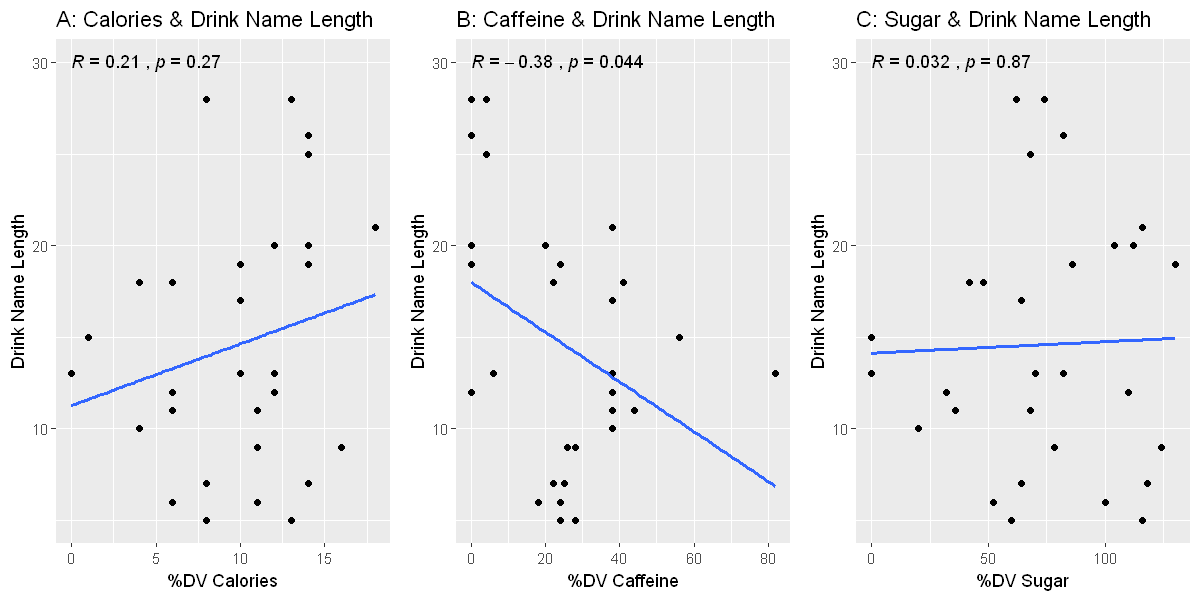

In [14]:
options(repr.plot.width = 10, repr.plot.height = 5)
p1 <- ggplot(dat, aes(cal, name_len)) + geom_point(shape = 16) + geom_smooth(method = lm, se = FALSE) +
  labs(x = "%DV Calories", y = "Drink Name Length", title = "A: Calories & Drink Name Length")  + 
  stat_cor(label.x = 0, label.y = 30)

p2 <- ggplot(dat, aes(caff, name_len)) + geom_point(shape = 16) + geom_smooth(method = lm, se = FALSE) + 
  labs(x = "%DV Caffeine", y = "Drink Name Length", title = "B: Caffeine & Drink Name Length") +
  stat_cor(label.x = 0, label.y = 30)

p3 <- ggplot(dat, aes(sug, name_len)) + geom_point(shape = 16) + geom_smooth(method = lm, se = FALSE) +
  labs(x = "%DV Sugar", y = "Drink Name Length", title = "C: Sugar & Drink Name Length") +
  stat_cor(label.x = 0, label.y = 30)

ggarrange(p1, p2, p3, ncol = 3)

#### Conclucions comparing drink name length to:
+  A) Calories: There is an extremely minimal correlation coefficient value for increasing calories and increasing name length.  However, the p-value is greater than the default alpha value of 0.05, so this result is not statistically significant, and we fail to reject the null hypothesis.
+  B) Caffeine: There is a very weak correlation coefficient value for increasing caffeine and decreasing name length.  The p-value juuust squeaks under 0.05, so this result is (technically) statistically significant and we reject the null hypothesis.  However, based upon visual analysis of the scatter plot, the distribution of outliers and grouped data points would suggest there is no actual correlation.
+  C) Sugar: There is a near-zero correlation coefficient value for increasing caffeine and decreasing name length.  The p-value is far greater than than 0.05, so this result is not statistically significant, and we embrace the null hypothesis.

##### I had hoped that comparing drink length name to various nutritional values would yield interesting patterns.  It did not, and produced some supremely ugly graphs.  However, no matter what the result is, it is essential to factually and openly report the findings.